In [1]:
import pandas as pd
df = pd.read_csv('bank_customer_churn_modeling.csv')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
for i in df:
    print(f'{i} : {df[i].unique()}')

RowNumber : [    1     2     3 ...  9998  9999 10000]
CustomerId : [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 7

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df['Gender'].replace({'Female':0,'Male':1}, inplace=True)
df['Geography'].replace({'France':0, 'Spain':1, 'Germany':2}, inplace=True)

In [10]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

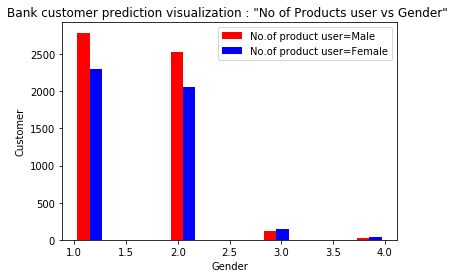

In [12]:
age_female = df[df.Gender == 0].NumOfProducts
age_male = df[df.Gender == 1].NumOfProducts
plt.xlabel('Gender')
plt.ylabel('Customer')
plt.title('Bank customer prediction visualization : "No of Products user vs Gender" ')
plt.hist([age_male,age_female],rwidth=0.8,color=['red','blue'],label=['No.of product user=Male','No.of product user=Female'])
plt.legend()

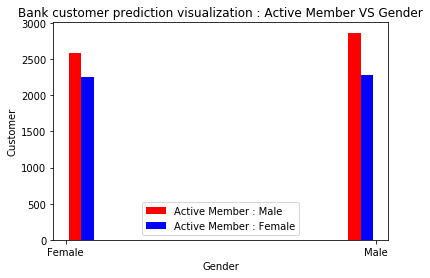

In [13]:
age_female = df[df.Gender == 0].IsActiveMember
age_male = df[df.Gender == 1].IsActiveMember
plt.xticks([0, 1], ['Female','Male'])
plt.xlabel('Gender')
plt.ylabel('Customer')
plt.title('Bank customer prediction visualization : Active Member VS Gender')
plt.hist([age_male,age_female],rwidth=0.8,color=['red','blue'],label=['Active Member : Male','Active Member : Female'])
plt.legend()

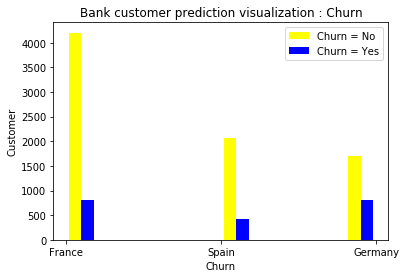

In [14]:
Churn_no = df[df.Exited == 0].Geography
Churn_yes = df[df.Exited == 1].Geography
plt.xticks([0, 1,2], ['France', 'Spain', 'Germany'])
plt.xlabel('Churn')
plt.ylabel('Customer')
plt.title('Bank customer prediction visualization : Churn')
plt.hist([Churn_no,Churn_yes],rwidth=0.8,color=['Yellow','Blue'],label=['Churn = No','Churn = Yes'])
plt.legend()

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [16]:
z = df[['CreditScore','Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

mms_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
z[mms_columns] = mms.fit_transform(z[mms_columns])

In [18]:
def unique_identifier(df):
    for i in df:
        print(f'{i} : {df[i].unique()}')

unique_identifier(z)

CreditScore : [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.

In [19]:
y=df['Exited']

In [20]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
ztrain,ztest,ytrain,ytest = train_test_split(z,y)
print(ztrain.shape)
print(ztest.shape)
print(ytrain.shape)
print(ytest.shape)

(7500, 10)
(2500, 10)
(7500,)
(2500,)


In [22]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
ann_regular = keras.Sequential([
    keras.layers.Dense(10, input_shape=(10,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
ann_regular.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [24]:
ann_regular.fit(ztrain,ytrain,epochs=100)

Epoch 1/100
235/235 [==============================] - 1s 1ms/step - loss: 0.5232 - accuracy: 0.7914
Epoch 2/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7987
Epoch 3/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4612 - accuracy: 0.8047
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8069
Epoch 5/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.8111
Epoch 6/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4366 - accuracy: 0.8091
Epoch 7/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4150 - accuracy: 0.8179
Epoch 8/100
235/235 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8217
Epoch 9/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8294
Epoch 10/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3966 - accura

235/235 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8578
Epoch 81/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8589
Epoch 82/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8625
Epoch 83/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3409 - accuracy: 0.8624
Epoch 84/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8562
Epoch 85/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8643
Epoch 86/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3287 - accuracy: 0.8644
Epoch 87/100
235/235 [==============================] - 0s 985us/step - loss: 0.3373 - accuracy: 0.8624
Epoch 88/100
235/235 [==============================] - 0s 1ms/step - loss: 0.3350 - accuracy: 0.8572
Epoch 89/100
235/235 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy

In [25]:
ann_regular.evaluate(ztest,ytest)

79/79 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8412


[0.39055758714675903, 0.8411999940872192]

In [26]:
import numpy as np
y_pred = ann_regular.predict(ztest)
y_pred = np.round(y_pred)

In [27]:
print("Classification Report: \n", classification_report(ytest, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.98      0.91      1950
           1       0.81      0.37      0.50       550

    accuracy                           0.84      2500
   macro avg       0.83      0.67      0.70      2500
weighted avg       0.84      0.84      0.82      2500



### Functions for the upcoming actions

In [28]:
def train_test(df,n):
    
    print('Churn value count : \n')
    
    print(df['Exited'].value_counts())
    z = df[['CreditScore','Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
    
    mms = MinMaxScaler()
    mms_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
    z[mms_columns] = mms.fit_transform(z[mms_columns])
    
    y=df['Exited']
    
    from sklearn.model_selection import train_test_split
    ztrain,ztest,ytrain,ytest = train_test_split(z,y)
    
    print("\nShape of train test split\n")
    
    print(ztrain.shape)
    print(ztest.shape)
    print(ytrain.shape)
    print(ytest.shape)

    print('\n Neural network starts\n')
    
    ann_regular = keras.Sequential([
        keras.layers.Dense(10, input_shape=(10,),activation='relu'),
        keras.layers.Dense(10,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    
    ann_regular.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    
    ann_regular.fit(ztrain,ytrain,epochs=n)
    
    y_pred = ann_regular.predict(ztest)
    y_pred = np.round(y_pred)
    
    return print("Classification Report: \n", classification_report(ytest, y_pred))

### Imbalanced dataset : Undersampling technique

In [29]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [30]:
df_0_count,df_1_count = df['Exited'].value_counts()

In [31]:
df_0_count,df_1_count

(7963, 2037)

In [32]:
df_0,df_1 = df[df['Exited'] == 0],df[df['Exited'] == 1]

In [33]:
df_0_class = df_0.sample(df_1_count)

In [34]:
df_0_class.shape

(2037, 14)

In [35]:
df_under = pd.concat([df_0_class,df_1],axis=0)

In [36]:
df_under['Exited'].value_counts()

1    2037
0    2037
Name: Exited, dtype: int64

In [37]:
train_test(df_under,50)

Churn value count : 

1    2037
0    2037
Name: Exited, dtype: int64

Shape of train test split

(3055, 10)
(1019, 10)
(3055,)
(1019,)

 Neural network starts

Epoch 1/50
96/96 [==============================] - 1s 1ms/step - loss: 0.8101 - accuracy: 0.5052
Epoch 2/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.5153
Epoch 3/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.5883
Epoch 4/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6619 - accuracy: 0.6255
Epoch 5/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6491 - accuracy: 0.6399
Epoch 6/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6297 - accuracy: 0.6669
Epoch 7/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6232 - accuracy: 0.6610
Epoch 8/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6207 - accuracy: 0.6775
Epoch 9/50
96/96 [==============================] - 0s 1

### Imbalanced dataset : Oversampling technique

In [38]:
df_0_count,df_1_count = df['Exited'].value_counts()
df_0_count,df_1_count

(7963, 2037)

In [39]:
df_0,df_1 = df[df['Exited']==0],df[df['Exited']==1]

In [40]:
df_1_class_over = df_1.sample(df_0_count,replace=True)
df_over = pd.concat([df_0,df_1_class_over],axis=0)
df_over['Exited'].value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [41]:
train_test(df_over,50)

Churn value count : 

1    7963
0    7963
Name: Exited, dtype: int64

Shape of train test split

(11944, 10)
(3982, 10)
(11944,)
(3982,)

 Neural network starts

Epoch 1/50
374/374 [==============================] - 1s 1ms/step - loss: 0.6656 - accuracy: 0.5993
Epoch 2/50
374/374 [==============================] - 0s 1ms/step - loss: 0.6307 - accuracy: 0.6503
Epoch 3/50
374/374 [==============================] - 0s 1ms/step - loss: 0.6180 - accuracy: 0.6605
Epoch 4/50
374/374 [==============================] - 0s 1ms/step - loss: 0.6065 - accuracy: 0.6715
Epoch 5/50
374/374 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.6758
Epoch 6/50
374/374 [==============================] - 0s 1ms/step - loss: 0.5919 - accuracy: 0.6839
Epoch 7/50
374/374 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.6955
Epoch 8/50
374/374 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.6983
Epoch 9/50
374/374 [==================

### Imbalanced Dataset Method : SMOTE 

In [42]:
z = df[['CreditScore','Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
    
mms = MinMaxScaler()
mms_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
z[mms_columns] = mms.fit_transform(z[mms_columns])
    
y=df['Exited']

In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
z_sm, y_sm = smote.fit_sample(z,y)

y_sm.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
ztrain1,ztest1,ytrain1,ytest1 = train_test_split(z_sm, y_sm)
print("\nShape of train test split\n")

print(ztrain1.shape)
print(ztest1.shape)
print(ytrain1.shape)
print(ytest1.shape)

print('\n Neural network starts\n')

ann_regular = keras.Sequential([
keras.layers.Dense(10, input_shape=(10,),activation='relu'),
keras.layers.Dense(10,activation='relu'),
keras.layers.Dense(1,activation='sigmoid')
])

ann_regular.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

ann_regular.fit(ztrain1,ytrain1,epochs=50)


Shape of train test split

(11944, 10)
(3982, 10)
(11944,)
(3982,)

 Neural network starts

Epoch 1/50
374/374 [==============================] - 1s 1ms/step - loss: 0.6763 - accuracy: 0.5665
Epoch 2/50
374/374 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.6685
Epoch 3/50
374/374 [==============================] - 0s 1ms/step - loss: 0.5777 - accuracy: 0.7035
Epoch 4/50
374/374 [==============================] - 0s 1ms/step - loss: 0.5464 - accuracy: 0.7311
Epoch 5/50
374/374 [==============================] - 0s 1ms/step - loss: 0.5471 - accuracy: 0.7238
Epoch 6/50
374/374 [==============================] - 0s 1ms/step - loss: 0.5265 - accuracy: 0.7414
Epoch 7/50
374/374 [==============================] - 0s 1ms/step - loss: 0.5153 - accuracy: 0.7555
Epoch 8/50
374/374 [==============================] - 0s 1ms/step - loss: 0.5058 - accuracy: 0.7596
Epoch 9/50
374/374 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7576
Epoch 1

In [45]:
y_pred1 = ann_regular.predict(ztest1)
y_pred1 = np.round(y_pred1)

print("Classification Report: \n", classification_report(ytest1, y_pred1))

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.70      0.76      1980
           1       0.74      0.85      0.79      2002

    accuracy                           0.78      3982
   macro avg       0.78      0.78      0.78      3982
weighted avg       0.78      0.78      0.78      3982



### Imbalanced dataset - Ensemble method

In [46]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [47]:
z2 = df[['CreditScore','Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
    
mms = MinMaxScaler()
mms_columns = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
z2[mms_columns] = mms.fit_transform(z2[mms_columns])
    
y2=df['Exited']

In [48]:
ztrain2,ztest2,ytrain2,ytest2 = train_test_split(z2,y2)

In [49]:
print(ztrain2.shape)
print(ztest2.shape)
print(ytrain2.shape)
print(ytest2.shape)

(7500, 10)
(2500, 10)
(7500,)
(2500,)


In [50]:
ytrain2.value_counts()

0    5951
1    1549
Name: Exited, dtype: int64

In [51]:
1518*3

4554

In [52]:
5982/3

1994.0

In [53]:
df3 = ztrain.copy()
df3.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1562,0.688,2,1,0.175676,6,0.434649,2,1,1,0.097196
2861,0.350,0,0,0.094595,6,0.000000,2,1,0,0.447818
4059,0.652,0,1,0.256757,10,0.423449,1,1,1,0.833413
5579,0.672,1,1,0.054054,8,0.000000,2,0,0,0.711669
6622,0.418,0,0,0.337838,1,0.000000,1,0,1,0.433155


In [54]:
df3['Exited'] = ytrain
df3.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1562,0.688,2,1,0.175676,6,0.434649,2,1,1,0.097196,1
2861,0.350,0,0,0.094595,6,0.000000,2,1,0,0.447818,0
4059,0.652,0,1,0.256757,10,0.423449,1,1,1,0.833413,0
5579,0.672,1,1,0.054054,8,0.000000,2,0,0,0.711669,0
6622,0.418,0,0,0.337838,1,0.000000,1,0,1,0.433155,0


In [55]:
df3_0 = df3[df3['Exited'] == 0]
df3_1 = df3[df3['Exited'] == 1]

In [56]:
def ensemble_imb(zero_class,ones_class,start,end):
    df_ensemble = pd.concat([ones_class,zero_class[start:end]],axis=0)
    ztrain_en = df_ensemble.drop('Exited', axis='columns')
    ytrain_en = df_ensemble.Exited
    return ztrain_en, ytrain_en

#### Ensemble 1 : From the range 0 - 1990

In [57]:
ztrain_en,ytrain_en = ensemble_imb(df3_0,df3_1,0,1990)

print('\n Neural network for Ensemple method - First set \n')

ann_regular2 = keras.Sequential([
keras.layers.Dense(10, input_shape=(10,),activation='relu'),
keras.layers.Dense(10,activation='relu'),
keras.layers.Dense(1,activation='sigmoid')
])

ann_regular2.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

ann_regular2.fit(ztrain_en,ytrain_en,epochs=50)


 Neural network for Ensemple method - First set 

Epoch 1/50
109/109 [==============================] - 1s 1ms/step - loss: 0.6898 - accuracy: 0.5548
Epoch 2/50
109/109 [==============================] - 0s 1ms/step - loss: 0.6673 - accuracy: 0.5923
Epoch 3/50
109/109 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.6107
Epoch 4/50
109/109 [==============================] - 0s 1ms/step - loss: 0.6386 - accuracy: 0.6491
Epoch 5/50
109/109 [==============================] - 0s 1ms/step - loss: 0.6296 - accuracy: 0.6494
Epoch 6/50
109/109 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.6704
Epoch 7/50
109/109 [==============================] - 0s 1ms/step - loss: 0.6071 - accuracy: 0.6692
Epoch 8/50
109/109 [==============================] - 0s 1ms/step - loss: 0.5986 - accuracy: 0.6790
Epoch 9/50
109/109 [==============================] - 0s 1ms/step - loss: 0.5923 - accuracy: 0.6787
Epoch 10/50
109/109 [============================

In [58]:
y_pred_en = ann_regular2.predict(ztest2)
y_pred_en = np.round(y_pred_en)

print("Classification Report: \n", classification_report(ytest2, y_pred_en))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      2012
           1       0.45      0.73      0.56       488

    accuracy                           0.77      2500
   macro avg       0.69      0.76      0.70      2500
weighted avg       0.83      0.77      0.79      2500



#### Ensemble 2 : From the range 1991 - 3980

In [59]:
ztrain_en2,ytrain_en2 = ensemble_imb(df3_0,df3_1,1991,3980)

print('\n Neural network for Ensemple method - Second set \n')

ann_regular3 = keras.Sequential([
keras.layers.Dense(10, input_shape=(10,),activation='relu'),
keras.layers.Dense(10,activation='relu'),
keras.layers.Dense(1,activation='sigmoid')
])

ann_regular3.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

ann_regular3.fit(ztrain_en2,ytrain_en2,epochs=50)


 Neural network for Ensemple method - Second set 

Epoch 1/50
109/109 [==============================] - 1s 1ms/step - loss: 0.7562 - accuracy: 0.5213
Epoch 2/50
109/109 [==============================] - 0s 1ms/step - loss: 0.6512 - accuracy: 0.6078
Epoch 3/50
109/109 [==============================] - 0s 1ms/step - loss: 0.6231 - accuracy: 0.6566
Epoch 4/50
109/109 [==============================] - 0s 1ms/step - loss: 0.6283 - accuracy: 0.6488
Epoch 5/50
109/109 [==============================] - 0s 1ms/step - loss: 0.6132 - accuracy: 0.6635
Epoch 6/50
109/109 [==============================] - 0s 1ms/step - loss: 0.5985 - accuracy: 0.6739
Epoch 7/50
109/109 [==============================] - 0s 1ms/step - loss: 0.5977 - accuracy: 0.6774
Epoch 8/50
109/109 [==============================] - 0s 1ms/step - loss: 0.5905 - accuracy: 0.6804
Epoch 9/50
109/109 [==============================] - 0s 1ms/step - loss: 0.5840 - accuracy: 0.6847
Epoch 10/50
109/109 [===========================

In [60]:
y_pred_en2 = ann_regular3.predict(ztest2)
y_pred_en2 = np.round(y_pred_en)

print("Classification Report: \n", classification_report(ytest2, y_pred_en2))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      2012
           1       0.45      0.73      0.56       488

    accuracy                           0.77      2500
   macro avg       0.69      0.76      0.70      2500
weighted avg       0.83      0.77      0.79      2500



#### Ensemble 2 : From the range 3980 - 5982

In [61]:
ztrain_en2,ytrain_en2 = ensemble_imb(df3_0,df3_1,3980,5982)

print('\n Neural network for Ensemple method - Second set \n')

ann_regular3 = keras.Sequential([
keras.layers.Dense(10, input_shape=(10,),activation='relu'),
keras.layers.Dense(10,activation='relu'),
keras.layers.Dense(1,activation='sigmoid')
])

ann_regular3.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])

ann_regular3.fit(ztrain_en2,ytrain_en2,epochs=50)


 Neural network for Ensemple method - Second set 

Epoch 1/50
110/110 [==============================] - 1s 1ms/step - loss: 0.7663 - accuracy: 0.5592
Epoch 2/50
110/110 [==============================] - 0s 1ms/step - loss: 0.6764 - accuracy: 0.5855
Epoch 3/50
110/110 [==============================] - 0s 1ms/step - loss: 0.6650 - accuracy: 0.5945
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.6044
Epoch 5/50
110/110 [==============================] - 0s 1ms/step - loss: 0.6324 - accuracy: 0.6551
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.6653
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 0.6126 - accuracy: 0.6623
Epoch 8/50
110/110 [==============================] - 0s 1ms/step - loss: 0.6073 - accuracy: 0.6712
Epoch 9/50
110/110 [==============================] - 0s 2ms/step - loss: 0.6027 - accuracy: 0.6788
Epoch 10/50
110/110 [===========================

In [62]:
y_pred_en2 = ann_regular3.predict(ztest2)
y_pred_en2 = np.round(y_pred_en)

print("Classification Report: \n", classification_report(ytest2, y_pred_en2))

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      2012
           1       0.45      0.73      0.56       488

    accuracy                           0.77      2500
   macro avg       0.69      0.76      0.70      2500
weighted avg       0.83      0.77      0.79      2500



#### *** According to the classification report SMOTE technique given the most accurate value